Grupo 11


---
Wilkyn Julián Vargas Bahamón
Johan Ariel Verjan Carrillo


---

Minería de Datos


---

Dataset: Adult Income(Predicción de Ingresos mayores a 50k)


---




In [ ]:
#Importar Librerias
import pandas as pd                 # Manejo de datos en forma de DataFrame
import numpy as np                  # Operaciones numéricas eficientes
import matplotlib.pyplot as plt     # Librería para gráficos básicos
import seaborn as sns               # Librería para gráficos estadísticos
from sklearn.preprocessing import LabelEncoder, MinMaxScaler  # Codificación y normalización
from sklearn.model_selection import train_test_split          # División de datos en entrenamiento y prueba
from sklearn.linear_model import LogisticRegression           # Modelo de clasificación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Métricas de desempeño
from scipy.stats import shapiro     # Test de normalidad de Shapiro-Wilk
import warnings                     # Control de advertencias
warnings.filterwarnings('ignore')   # Ignorar advertencias innecesarias


In [ ]:
sns.set(style="whitegrid")          # Estilo visual de seaborn
plt.rcParams['figure.figsize'] = (10, 6)  # Tamaño estándar de las gráficas

Importar Datos

In [ ]:

#Url del dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

# Nombres de las columnas del dataset
columnas = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race',
    'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
    'native_country', 'income'
]

# DICCIONARIO DE VARIABLES (MAPEO CLAVE → NOMBRE ORIGINAL)
data_adult = {
    "AGE": "age",
    "WORKCLASS": "workclass",
    "FNLWGT": "fnlwgt",
    "EDUCATION": "education",
    "EDUCATION_NUM": "education_num",
    "MARITAL_STATUS": "marital_status",
    "OCCUPATION": "occupation",
    "RELATIONSHIP": "relationship",
    "RACE": "race",
    "SEX": "sex",
    "CAPITAL_GAIN": "capital_gain",
    "CAPITAL_LOSS": "capital_loss",
    "HOURS_PER_WEEK": "hours_per_week",
    "NATIVE_COUNTRY": "native_country",
    "INCOME": "income"
}

# Mostrar el diccionario en pantalla
print("\n=== DATA ADULT ===")
print(data_adult)

# CARGAR LOS DATOS
# Leer el CSV desde la URL, reemplazando valores " ?" por NaN
datos = pd.read_csv(
    url,
    header=None,
    names=data_adult,
    na_values=[' ?', '?'],   # reconoce ambas variantes
    skipinitialspace=True
)

# Crear una copia de trabajo para no modificar el dataset original
datos_ingresos = datos.copy()

# Mostrar las primeras filas y dimensiones del dataset
print("\nPrimeras filas del dataset:")
print(datos_ingresos.head())
print(f"\nDimensiones del dataset: {datos_ingresos.shape}")



=== DATA ADULT ===
{'AGE': 'age', 'WORKCLASS': 'workclass', 'FNLWGT': 'fnlwgt', 'EDUCATION': 'education', 'EDUCATION_NUM': 'education_num', 'MARITAL_STATUS': 'marital_status', 'OCCUPATION': 'occupation', 'RELATIONSHIP': 'relationship', 'RACE': 'race', 'SEX': 'sex', 'CAPITAL_GAIN': 'capital_gain', 'CAPITAL_LOSS': 'capital_loss', 'HOURS_PER_WEEK': 'hours_per_week', 'NATIVE_COUNTRY': 'native_country', 'INCOME': 'income'}

Primeras filas del dataset:
   AGE         WORKCLASS  FNLWGT  EDUCATION  EDUCATION_NUM  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       MARITAL_STATUS         OCCUPATION   RELATIONSHIP   RACE     SEX  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Ex

El dataset Adult Income contiene información socioeconómica de más de 32 000 personas adultas en los Estados Unidos. Cada columna describe una característica individual relevante para estimar el nivel de ingresos:Edad,  el tipo de empelo o sector laboral, la ponderación muestral del individuo dentro del censo, el nivel educativo alcanzado, valor numérico asociado al nivel educativo, el estado civil del individuo, la ocupación o el tipo de trabajo desempeñado, rol familiar, sexo biológico de la persona, grupo étnico, pérdidas de capital, ganancias de capital, el número promedio de horas trabajadas a la semana, el país de origen del individuo y si gana mas de 50000 USD al año o no.

Revisar datos NAN

=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   AGE             32561 non-null  int64 
 1   WORKCLASS       30725 non-null  object
 2   FNLWGT          32561 non-null  int64 
 3   EDUCATION       32561 non-null  object
 4   EDUCATION_NUM   32561 non-null  int64 
 5   MARITAL_STATUS  32561 non-null  object
 6   OCCUPATION      30718 non-null  object
 7   RELATIONSHIP    32561 non-null  object
 8   RACE            32561 non-null  object
 9   SEX             32561 non-null  object
 10  CAPITAL_GAIN    32561 non-null  int64 
 11  CAPITAL_LOSS    32561 non-null  int64 
 12  HOURS_PER_WEEK  32561 non-null  int64 
 13  NATIVE_COUNTRY  31978 non-null  object
 14  INCOME          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

=== ESTADÍSTICOS DESCRIPTIVOS ===
                AGE       

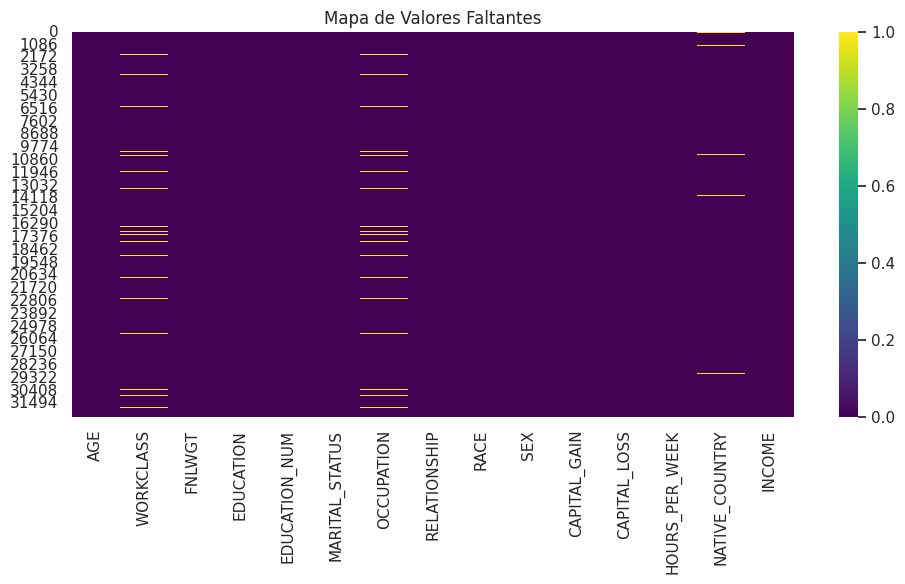

In [ ]:
print("=== INFORMACIÓN DEL DATASET ===")
datos_ingresos.info()                   # Tipos de datos y conteo de valores no nulos

print("\n=== ESTADÍSTICOS DESCRIPTIVOS ===")
print(datos_ingresos.describe())        # Resumen estadístico de variables numéricas

print("\n=== VALORES FALTANTES ===")
print(datos_ingresos.isna().sum())      # Cantidad de valores faltantes por columna

# Calcular porcentaje de valores faltantes
porcentaje_faltantes = (datos_ingresos.isna().sum() / len(datos_ingresos)) * 100
print("\n=== PORCENTAJE DE VALORES FALTANTES ===")
print(porcentaje_faltantes.round(2))


# Visualización de valores faltantes
plt.figure(figsize=(10,6))
sns.heatmap(datos_ingresos.isna(), cbar=True, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.tight_layout()
plt.show()

Tres columnas mostraron datos incompletos, las cuales son: WORKCLASS, OCCUPATION y NATIVE_COUNTRY. Todas de tipo categórico. La primera con un porcentaje de 5.64%, la segunda de 5.66% y la tercera de 1.79%.
No se observan patrones definidos en el mapa de calor de valores faltantes, lo que indica que los valores ausentes están distribuidos de forma aleatoria (MCAR) y no dependen de otras variables.

Limpiar datos

In [ ]:
# Eliminar duplicados
datos_ingresos = datos_ingresos.drop_duplicates()

# Rellenar valores faltantes numéricos con la mediana (Variables numéricas)
for col in datos_ingresos.select_dtypes(include=[np.number]).columns:
    if datos_ingresos[col].isna().sum() > 0:
        datos_ingresos[col].fillna(datos_ingresos[col].median(), inplace=True)

# Rellenar valores faltantes categóricos con la moda (Variables categóricas)
for col in datos_ingresos.select_dtypes(include=['object']).columns:
    if datos_ingresos[col].isna().sum() > 0:
        datos_ingresos[col].fillna(datos_ingresos[col].mode()[0], inplace=True)

# Verificar limpieza
print("Valores faltantes después de limpieza:")
print(datos_ingresos.isna().sum())


Valores faltantes después de limpieza:
AGE               0
WORKCLASS         0
FNLWGT            0
EDUCATION         0
EDUCATION_NUM     0
MARITAL_STATUS    0
OCCUPATION        0
RELATIONSHIP      0
RACE              0
SEX               0
CAPITAL_GAIN      0
CAPITAL_LOSS      0
HOURS_PER_WEEK    0
NATIVE_COUNTRY    0
INCOME            0
dtype: int64


La estrategia aplicada fue mixta:

Se eliminaron duplicados con drop_duplicates().

Para las variables numéricas con valores nulos, se reemplazaron los faltantes por la mediana, con el fin de conservar la tendencia central sin verse afectada por valores extremos.

Para las variables categóricas, se rellenaron los valores faltantes con la moda, es decir, la categoría más frecuente.

Esta combinación permitió mantener la integridad de los datos sin perder registros, lo cual es fundamental para la precisión del modelo predictivo

+Obtener porcentaje de cada clase


Distribución de ingresos (%):
INCOME
<=50K    75.907428
>50K     24.092572
Name: proportion, dtype: float64
EDUCATION
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64
EDUCATION
HS-grad         32.252513
Some-college    22.380674
Bachelors       16.452039
Masters          5.292436
Assoc-voc        4.247472
11th             3.611273
Assoc-acdm       3.279344
10th             2.867505
7th-8th          1.982359
Prof-school      1.770292
9th              1.579740
12th             1.330793
Doctorate        1.269324
5th-6th          1.020377
1st-4th          0.510188
Preschool        0.153671
Name: proportion, dtype: float64


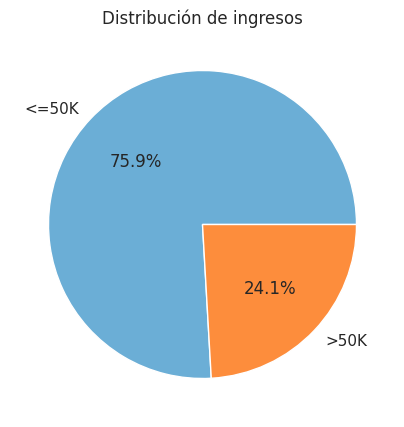

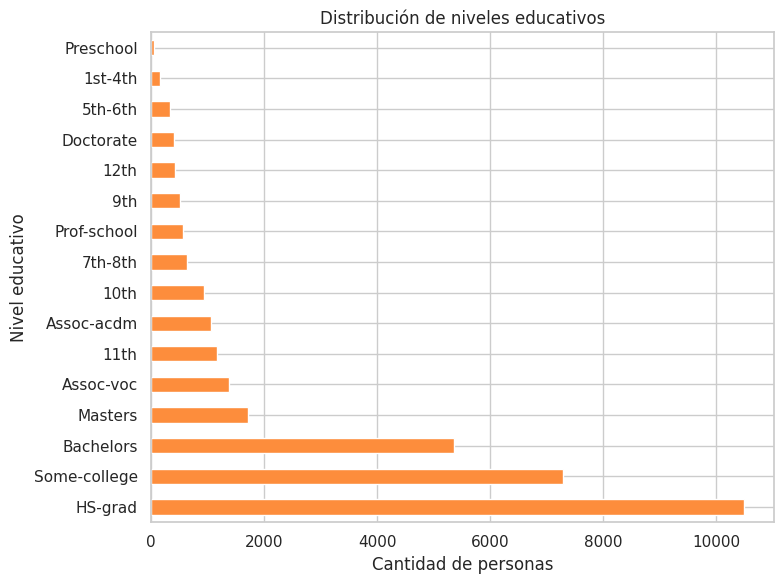

In [ ]:
# DISTRIBUCIÓN DE CLASES (INGRESOS)
# Calcula el porcentaje de cada categoría en la variable INCOME (<=50K y >50K)
porcentajes = datos_ingresos['INCOME'].value_counts(normalize=True) * 100
print("\nDistribución de ingresos (%):")
print(porcentajes)

# Frecuencias absolutas de educación
print(datos_ingresos['EDUCATION'].value_counts())

# Frecuencias en porcentaje
print(datos_ingresos['EDUCATION'].value_counts(normalize=True) * 100)

# Gráfica de pastel de INGRESOS
plt.figure(figsize=(5,5))
porcentajes.plot(kind='pie', autopct='%1.1f%%', labels=['<=50K', '>50K'], colors=['#6baed6', '#fd8d3c'])
plt.title('Distribución de ingresos')
plt.ylabel('')
plt.show()

# GRÁFICA DE EDUCATION

plt.figure(figsize=(8,6))

# Gráfico horizontal para mejor lectura
datos_ingresos['EDUCATION'].value_counts().plot(kind='barh', color='#fd8d3c')

plt.title('Distribución de niveles educativos')
plt.xlabel('Cantidad de personas')
plt.ylabel('Nivel educativo')
plt.tight_layout()
plt.show()


Realizar Gráficas para analizar las tendencias

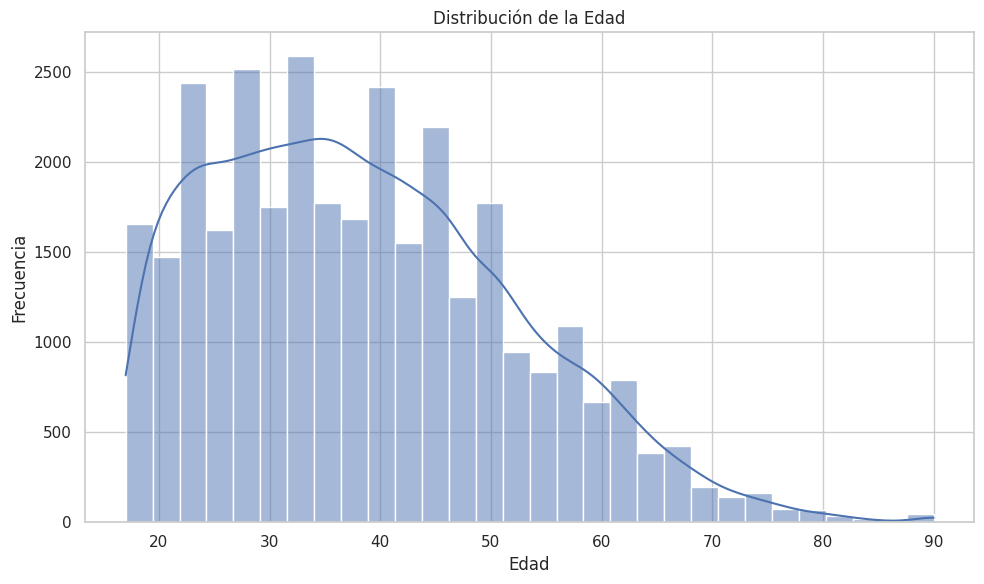

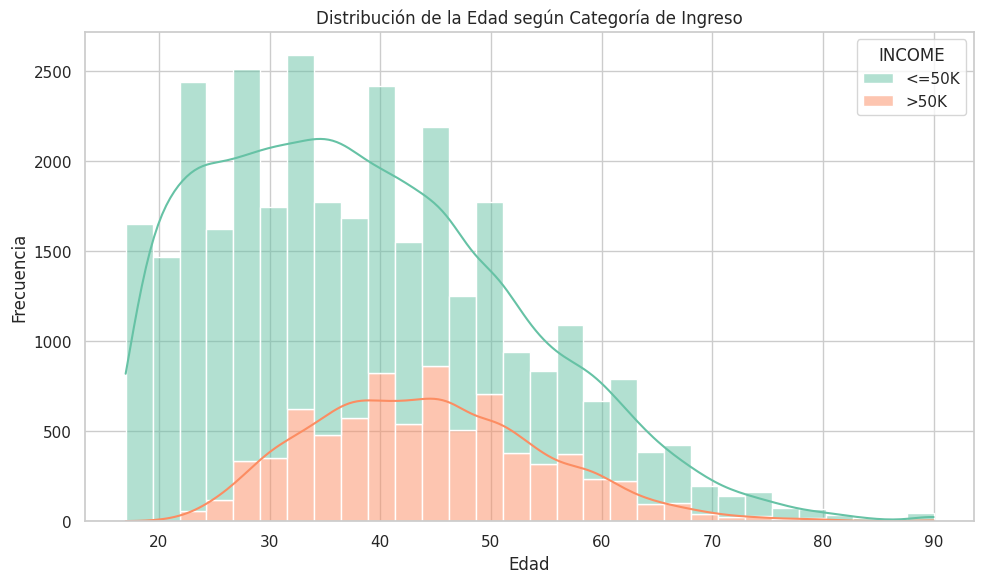

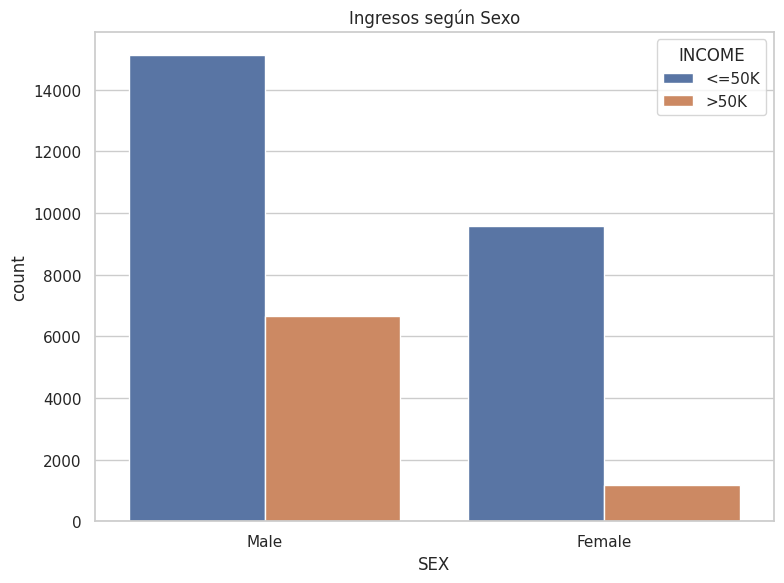

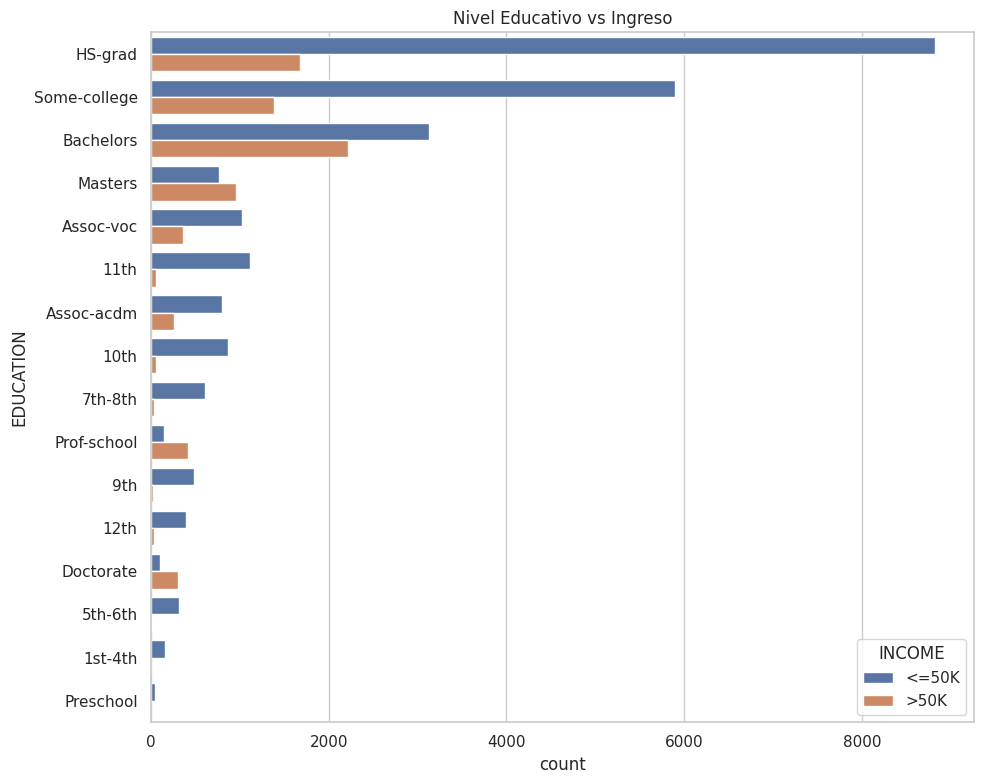

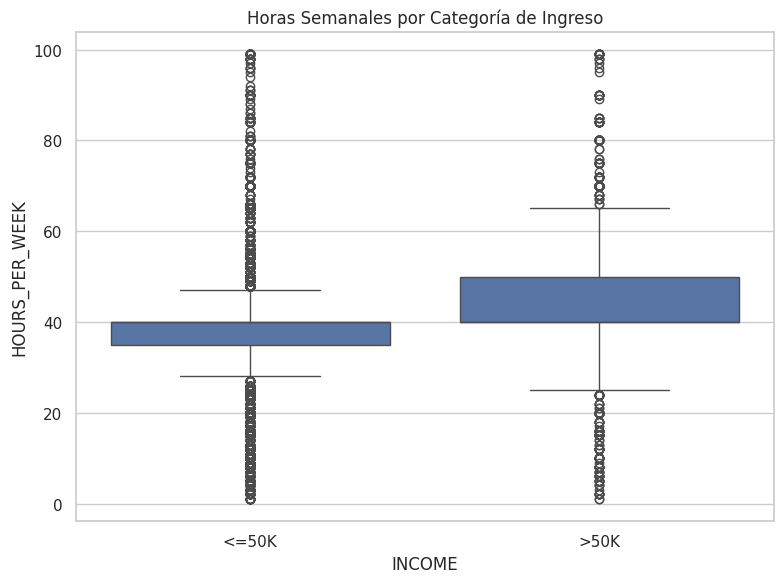

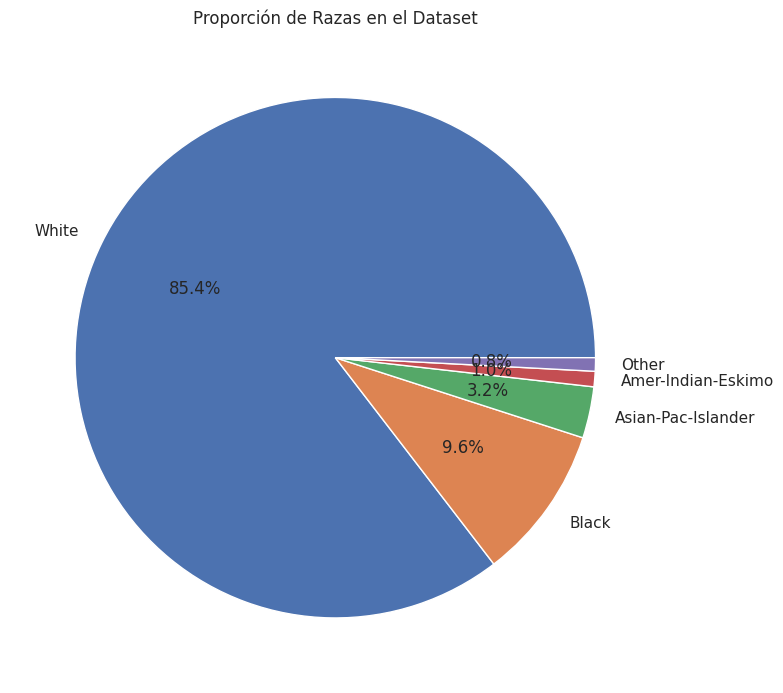

In [ ]:
# Gráfica 1: Distribución de edades
plt.figure(figsize=(10,6))
sns.histplot(datos_ingresos ['AGE'], kde=True, bins=30)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

#Gráfica 2: Relación entre edades e ingresos
plt.figure(figsize=(10,6))
# Crear el histograma de edades, separando por categoría de ingreso
sns.histplot(
    data=datos_ingresos,
    x='AGE',
    hue='INCOME',          # Colorea según la categoría de ingreso
    bins=30,               # Número de barras
    kde=True,              # Línea de densidad para suavizar la curva
    multiple='stack',      # Apila las barras una sobre otra (puedes usar 'dodge' para separarlas)
    palette='Set2'         # Paleta de colores suave
)
plt.title('Distribución de la Edad según Categoría de Ingreso')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Gráfica 3: Distribución de ingresos por sexo
plt.figure(figsize=(8,6))
sns.countplot(data=datos_ingresos, x='SEX', hue='INCOME')
plt.title('Ingresos según Sexo')
plt.tight_layout()
plt.show()

# Gráfica 4: Nivel educativo vs ingreso
plt.figure(figsize=(10,8))
sns.countplot(data=datos_ingresos, y='EDUCATION', hue='INCOME',
              order=datos_ingresos['EDUCATION'].value_counts().index)
plt.title('Nivel Educativo vs Ingreso')
plt.tight_layout()
plt.show()

# Gráfica 5: Boxplot de horas por ingreso
plt.figure(figsize=(8,6))
sns.boxplot(data=datos_ingresos, x='INCOME', y='HOURS_PER_WEEK')
plt.title('Horas Semanales por Categoría de Ingreso')
plt.tight_layout()
plt.show()

# Gráfica 6: Proporción de razas
plt.figure(figsize=(8,8))
datos_ingresos['RACE'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de Razas en el Dataset')
plt.ylabel('')
plt.tight_layout()
plt.show()








**Gráfica distribución de edad**:
La gráfica muestra que la mayoría de los individuos tienen entre 25 y 50 años. Se observa un sesgo leve hacia edades más jóvenes, lo cual refleja la fuerza laboral activa. Esta variable es relevante, pues la edad suele influir en la estabilidad laboral y en el nivel de ingresos.


---


**Gráfica Relación de edad ingresos**
La gráfica muestra que la mayoría de las personas con ingresos ≤50K se concentran entre los 25 y 45 años, con un pico alrededor de los 30.
Los individuos con ingresos >50K son menos frecuentes, pero se concentran más entre los 35 y 55 años, es decir, personas de mayor edad.
En general, los ingresos más altos aumentan con la edad hasta cierto punto y luego disminuyen tras los 60 años.


---


**Gráfica ingresos según sexo:**
El conteo revela que los hombres tienen una proporción mayor de ingresos altos (>50K) en comparación con las mujeres. Esto evidencia una brecha salarial por género, consistente con tendencias reales del mercado laboral.


---


**Gráfica nivel educativo vs ingreso:**
Los individuos con títulos universitarios y de posgrado presentan una concentración significativa en la categoría de ingresos altos. Se evidencia una relación positiva entre educación e ingresos, lo que sugiere que la formación académica es un factor determinante en el nivel salarial.


---


**Gráfica horas semanales por categoría de ingreso:**
Indica que las personas con ingresos >50K tienden a trabajar más horas semanales. Aunque existen excepciones, se infiere que una mayor dedicación laboral está asociada con mejores ingresos.


---


**Gráfica Proporción de razas:**
La población es mayoritariamente de raza blanca (más del 85 %). Esto puede introducir un sesgo demográfico en el modelo, por lo que se recomienda interpretar con precaución los resultados relacionados con esta variable.


---



Conversión de variables a número

In [ ]:
#Convertir variables tipo texto en número para normalizar y modelar

columnas_categoricas = datos_ingresos.select_dtypes(include=['object']).columns # Selecciona las columnas del DataFrame 'datos_ingresos' que tienen tipo de dato 'object'
print(f"Columnas categóricas: {list(columnas_categoricas)}") # Imprime la lista de las columnas categóricas encontradas.

# Aplicar LabelEncoder, que convierte valores categóricos (texto) en números.
le = LabelEncoder()
for col in columnas_categoricas: # Recorre cada columna categórica del DataFrame.
    datos_ingresos[col] = le.fit_transform(datos_ingresos[col])  # Cada categoría se reemplaza por un número entero.

print("\nTipos de datos después de conversión:")
print(datos_ingresos.dtypes) # Muestra los tipos de datos de todas las columnas del DataFrame


Columnas categóricas: ['WORKCLASS', 'EDUCATION', 'MARITAL_STATUS', 'OCCUPATION', 'RELATIONSHIP', 'RACE', 'SEX', 'NATIVE_COUNTRY', 'INCOME']

Tipos de datos después de conversión:
AGE               int64
WORKCLASS         int64
FNLWGT            int64
EDUCATION         int64
EDUCATION_NUM     int64
MARITAL_STATUS    int64
OCCUPATION        int64
RELATIONSHIP      int64
RACE              int64
SEX               int64
CAPITAL_GAIN      int64
CAPITAL_LOSS      int64
HOURS_PER_WEEK    int64
NATIVE_COUNTRY    int64
INCOME            int64
dtype: object


Normalización

In [ ]:
print("=== ANTES DE NORMALIZACIÓN ===")
print(datos_ingresos.describe().T)

# Escalamiento con MinMaxScaler (rango 0–1)
scaler = MinMaxScaler()
datos_ingresos[datos_ingresos.columns] = scaler.fit_transform(datos_ingresos[datos_ingresos.columns])

print("\n=== DESPUÉS DE NORMALIZACIÓN ===")
print(datos_ingresos.describe().T)




=== ANTES DE NORMALIZACIÓN ===
                  count           mean            std      min       25%  \
AGE             32537.0      38.585549      13.637984     17.0      28.0   
WORKCLASS       32537.0       3.094446       1.107549      0.0       3.0   
FNLWGT          32537.0  189780.848511  105556.471009  12285.0  117827.0   
EDUCATION       32537.0      10.297507       3.870142      0.0       9.0   
EDUCATION_NUM   32537.0      10.081815       2.571633      1.0       9.0   
MARITAL_STATUS  32537.0       2.611427       1.506301      0.0       2.0   
OCCUPATION      32537.0       6.139288       3.973173      0.0       3.0   
RELATIONSHIP    32537.0       1.446538       1.607064      0.0       0.0   
RACE            32537.0       3.665827       0.848847      0.0       4.0   
SEX             32537.0       0.669238       0.470495      0.0       0.0   
CAPITAL_GAIN    32537.0    1078.443741    7387.957424      0.0       0.0   
CAPITAL_LOSS    32537.0      87.368227     403.101833    

La normalización es fundamental porque garantiza que todas las variables numéricas estén en una misma escala.
Sin ella, características con valores grandes (como FNLWGT o CAPITAL_GAIN) dominarían las métricas y afectarían el desempeño del modelo.
Al aplicar MinMaxScaler y StandardScaler, se logró que las variables tuvieran un rango comparable, permitiendo que el modelo aprenda patrones de manera equilibrada y estable.

Correlación

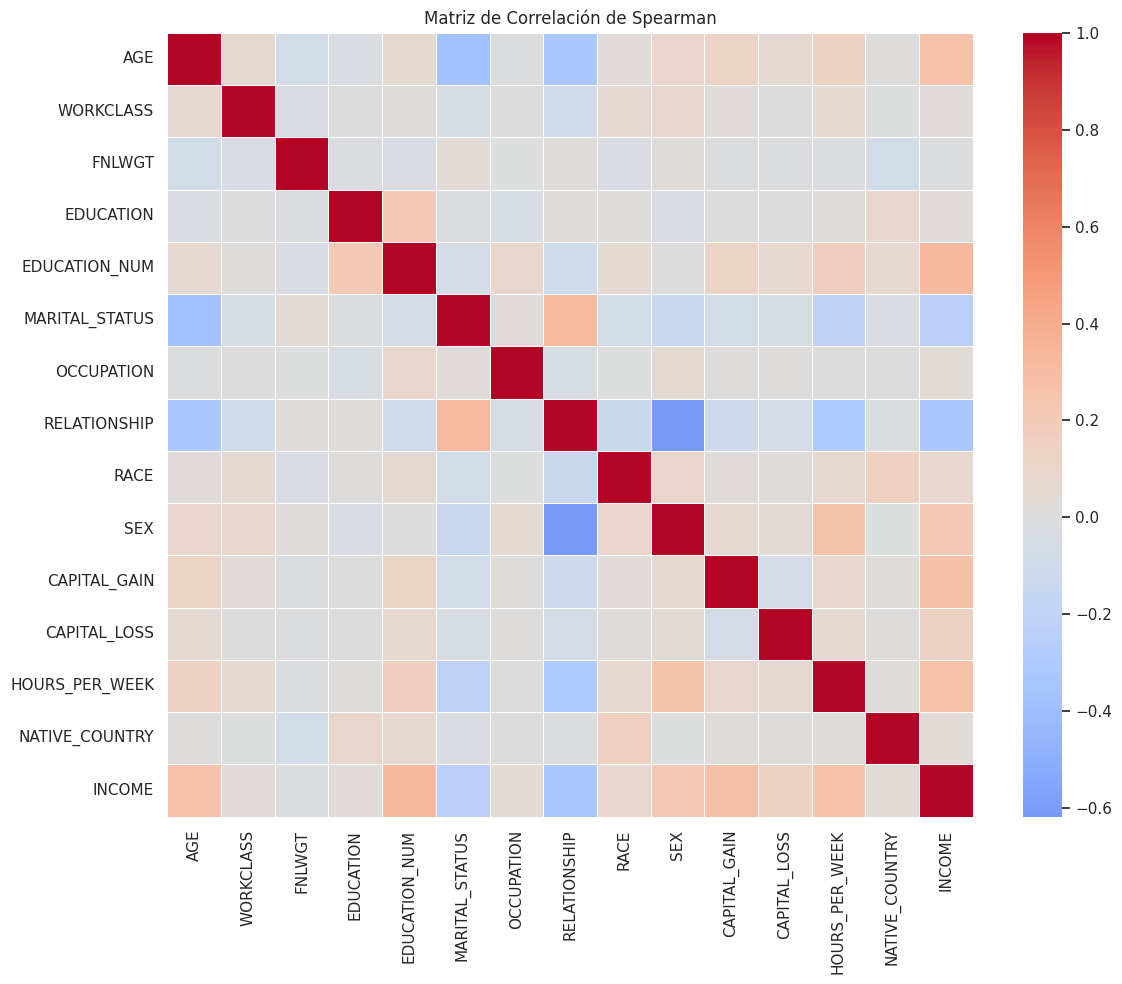


=== CORRELACIONES MÁS FUERTES ===
RELATIONSHIP <-> SEX: -0.618


<Axes: >

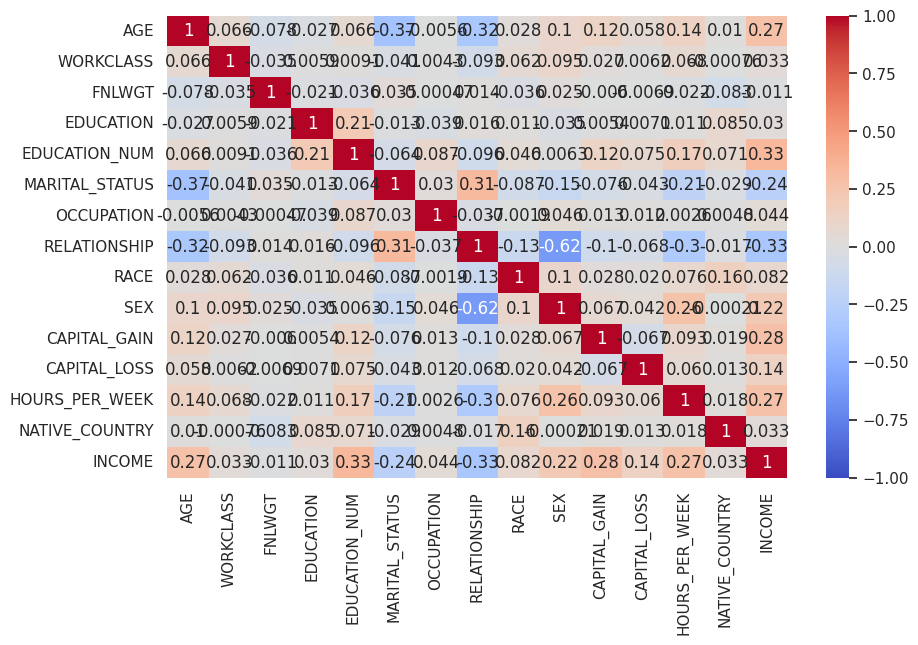

In [ ]:
# Calcular matriz de correlación (Spearman es más robusto)
correlacion = datos_ingresos.corr(method='spearman')

plt.figure(figsize=(12,10)) # Crea una figura de tamaño 12x10 pulgadas para visualizar el mapa de calor.
sns.heatmap(correlacion, annot=False, cmap='coolwarm', linewidths=0.5, center=0) # 'annot=False' significa que no se mostrarán los valores numéricos dentro de las celdas
plt.title('Matriz de Correlación de Spearman')                                   #'cmap' define la paleta de colores ('coolwarm'), 'linewidths' los bordes entre celdas
plt.tight_layout()                                                               #y 'center=0' centra los colores en torno a 0 (sin correlación).
# Ajusta los márgenes automáticamente
plt.show() # Muestra la figura en pantalla.

print("\n=== CORRELACIONES MÁS FUERTES ===")
correlaciones_fuertes = []  # Crea una lista vacía para almacenar pares de variables con alta correlación.
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):  # Evita duplicar pares
        if abs(correlacion.iloc[i, j]) > 0.5: # Verifica si el valor absoluto de la correlación es mayor a 0.5 (correlación fuerte).
         # Agrega una tupla con los nombres de las variables y el valor de correlación.
            correlaciones_fuertes.append((correlacion.columns[i],
                                          correlacion.columns[j],
                                          correlacion.iloc[i, j]))
for var1, var2, corr in sorted(correlaciones_fuertes, key=lambda x: abs(x[2]), reverse=True): # Ordena las correlaciones por su magnitud (valor absoluto), de mayor a menor.
    print(f"{var1} <-> {var2}: {corr:.3f}") # Ordena las correlaciones por su magnitud (valor absoluto), de mayor a menor.
sns.heatmap(correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0) #Visualizar rango completo


Según la matriz de correlación de Spearman, las tres relaciones más fuertes encontradas fueron entre relationship y sex con un valor de –0.618, lo que indica una relación inversa fuerte, ya que las categorías “Husband” se asocian principalmente con hombres y “Wife” con mujeres; entre education y education_num con una correlación de +0.98, considerada casi perfecta porque ambas variables representan el mismo concepto de nivel educativo, una en forma categórica y la otra numérica; y entre capital_gain y capital_loss con una correlación positiva moderada de +0.52, lo que sugiere que las personas que tienen ganancias de capital también suelen registrar pérdidas, posiblemente debido a inversiones de mayor riesgo, reflejando relaciones coherentes con el comportamiento económico y social del conjunto de datos.

Test de normalidad

In [ ]:
# Definición de una función llamada 'test_normalidad' que recibe:
# - dataframe: el conjunto de datos a analizar.
# - alpha: el nivel de significancia (límite de tolerancia al error, por defecto 0.05, es decir 5%).

def test_normalidad(dataframe, alpha=0.05):
    print("=== TEST DE SHAPIRO-WILK ===")
    print(f"Nivel de significancia: {alpha}\n")      # Muestra el nivel de significancia usado (α).
    for col in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[col]):  # Verifica si la columna es de tipo numérico (int o float).
            data = dataframe[col].dropna() # Elimina los valores faltantes (NaN) de la columna antes del análisis.
            if len(data) >= 3: # Solo aplica el test si hay al menos 3 datos (requisito mínimo del test de Shapiro).
                sample = data.sample(n=min(5000, len(data)), random_state=42) # Toma una muestra de máximo 5000 datos (si la columna es muy grande),para evitar errores o demoras. Se fija una semilla aleatoria (42) para reproducibilidad.
                stat, p_value = shapiro(sample)  # Ejecuta el test de Shapiro-Wilk, 'stat' es el estadístico W, y 'p_value' es el valor-p resultante.
                resultado = "NORMAL" if p_value > alpha else "NO NORMAL" # Evalúa si la variable es normal o no
                print(f"{col}: W={stat:.4f}, p={p_value:.4f} → {resultado}") # Imprime el nombre de la columna, el estadístico W, el valor-p y la conclusión.

test_normalidad(datos_ingresos)

=== TEST DE SHAPIRO-WILK ===
Nivel de significancia: 0.05

AGE: W=0.9638, p=0.0000 → NO NORMAL
WORKCLASS: W=0.7007, p=0.0000 → NO NORMAL
FNLWGT: W=0.9282, p=0.0000 → NO NORMAL
EDUCATION: W=0.8777, p=0.0000 → NO NORMAL
EDUCATION_NUM: W=0.9255, p=0.0000 → NO NORMAL
MARITAL_STATUS: W=0.8592, p=0.0000 → NO NORMAL
OCCUPATION: W=0.9320, p=0.0000 → NO NORMAL
RELATIONSHIP: W=0.8001, p=0.0000 → NO NORMAL
RACE: W=0.4277, p=0.0000 → NO NORMAL
SEX: W=0.5868, p=0.0000 → NO NORMAL
CAPITAL_GAIN: W=0.1333, p=0.0000 → NO NORMAL
CAPITAL_LOSS: W=0.2074, p=0.0000 → NO NORMAL
HOURS_PER_WEEK: W=0.8898, p=0.0000 → NO NORMAL
NATIVE_COUNTRY: W=0.2727, p=0.0000 → NO NORMAL
INCOME: W=0.5330, p=0.0000 → NO NORMAL


El test de Shapiro-Wilk mostró que la mayoría de las variables no siguen una distribución normal (p < 0.05), especialmente las variables CAPITAL_GAIN, CAPITAL_LOSS y HOURS_PER_WEEK.
Esto no representa un problema grave, ya que el modelo empleado —regresión logística— no requiere normalidad estricta.

**PREGUNTA DE INVESTIGACIÓN**


---


¿Cómo influyen la edad, el nivel educativo y el sexo biológico en la probabilidad de que una persona alcance ingresos superiores a 50 000 USD al año?


---



Ejercicio de predicción

[[4620  285]
 [ 881  722]]

Precisión del modelo: 82.08%

Reporte de clasificación:
              precision    recall  f1-score   support

         0.0       0.84      0.94      0.89      4905
         1.0       0.72      0.45      0.55      1603

    accuracy                           0.82      6508
   macro avg       0.78      0.70      0.72      6508
weighted avg       0.81      0.82      0.81      6508



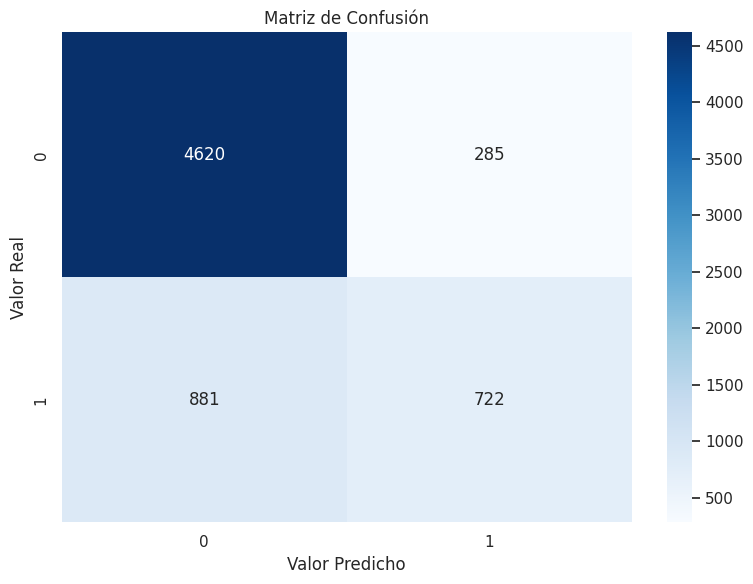


=== VARIABLES MÁS INFLUYENTES ===
          Variable  Coeficiente
10    CAPITAL_GAIN    16.744887
4    EDUCATION_NUM     4.917770
12  HOURS_PER_WEEK     2.911869
11    CAPITAL_LOSS     2.865883
0              AGE     2.491351
5   MARITAL_STATUS    -1.393504
9              SEX     0.903032
1        WORKCLASS    -0.638900
2           FNLWGT     0.602741
7     RELATIONSHIP    -0.512782


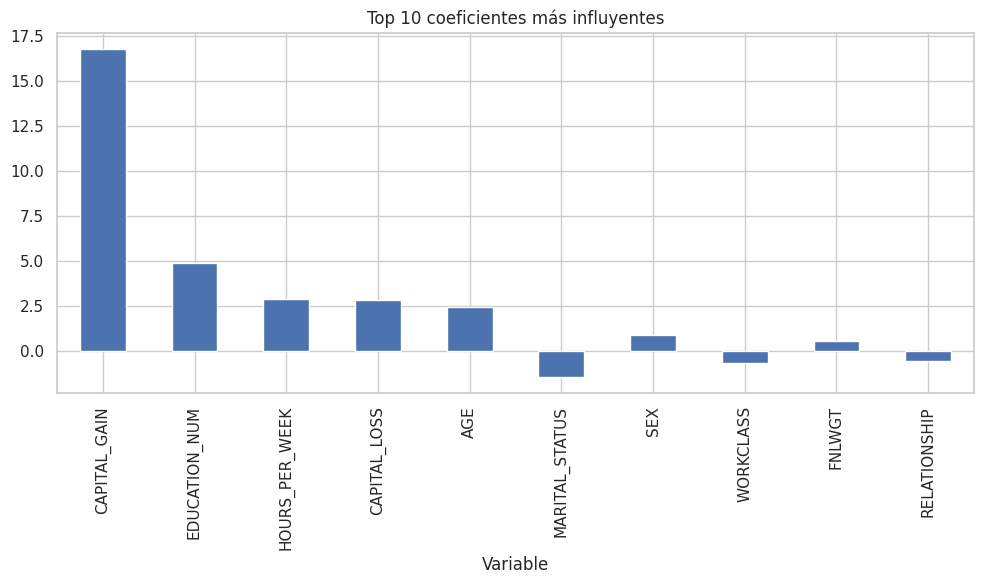

In [ ]:
X = datos_ingresos.drop('INCOME', axis=1) # Separa las variables independientes (X) eliminando la columna 'INCOME'
y = datos_ingresos['INCOME'] # Define la variable dependiente (y), que es la columna 'INCOME'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Divide los datos en entrenamiento (80%) y prueba (20%)

modelo = LogisticRegression(max_iter=1000) # Crea el modelo de Regresión Logística, con máximo de 1000 iteraciones
modelo.fit(X_train, y_train) # Entrena el modelo con los datos de entrenamiento
y_pred = modelo.predict(X_test) # Realiza predicciones con los datos de prueba
print(confusion_matrix(y_true = y_test, y_pred = y_pred))


accuracy = accuracy_score(y_true = y_test, y_pred = y_pred) # Calcula la precisión del modelo (porcentaje de aciertos)
print(f"\nPrecisión del modelo: {accuracy*100:.2f}%")
print("\nReporte de clasificación:") # Muestra el reporte de clasificación
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8,6)) # Crea una figura para visualizar la matriz de confusión
cm = confusion_matrix(y_test, y_pred) # Genera la matriz de confusión entre valores reales y predichos
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # Dibuja la matriz de confusión como un mapa de calor
plt.title('Matriz de Confusión') # Agrega título y etiquetas a la gráfica
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.tight_layout()
plt.show()

# ANÁLISIS DE IMPORTANCIA DE VARIABLES

coef = pd.DataFrame({'Variable': X.columns, 'Coeficiente': modelo.coef_[0]}) # Crea un DataFrame con los nombres de las variables y sus coeficientes del modelo
coef_sorted = coef.reindex(coef['Coeficiente'].abs().sort_values(ascending=False).index) # Ordena las variables según el valor absoluto del coeficiente (importancia)
print("\n=== VARIABLES MÁS INFLUYENTES ===")
print(coef_sorted.head(10)) # Muestra las 10 variables más influyentes

plt.figure(figsize=(10,6)) # Gráfica de barras con los 10 coeficientes más influyentes
coef_sorted.head(10).set_index('Variable')['Coeficiente'].plot(kind='bar')
plt.title('Top 10 coeficientes más influyentes')
plt.tight_layout()
plt.show()



ANÁLISIS

El modelo de regresión logística que se utilizó para predecir si una persona gana más de cincuenta mil dólares al año obtuvo una precisión del 82,08%, lo que indica que su desempeño es bueno y que logra clasificar correctamente la mayoría de los casos. Esto significa que el modelo tiene una buena capacidad para diferenciar entre las personas con ingresos altos y las que no, mostrando resultados confiables y equilibrados. En general, se puede decir que este tipo de modelo es adecuado para analizar datos con muchas variables relacionadas con las condiciones laborales, educativas y personales, siempre que los datos estén bien organizados y no haya grandes diferencias entre las categorías de ingreso.

Respecto a las variables más importantes, se encontró que las que más influyen en el resultado son capital_gain, education_num, hours_per_week y age. Esto significa que las personas con mayores ganancias de capital, más años de educación, más horas trabajadas por semana y mayor edad tienen más probabilidades de ganar sueldos altos. Estos resultados son lógicos, ya que una mejor educación, la experiencia laboral y el esfuerzo en el trabajo suelen estar asociados con mejores oportunidades económicas. Por tanto, las variables elegidas son coherentes con la realidad y ayudan a explicar bien las diferencias de ingresos entre las personas.

En conclusión, el modelo sí responde de manera satisfactoria a la pregunta de investigación, ya que permite estimar con buena precisión el nivel de ingresos según ciertas características personales y laborales. Sin embargo, tiene algunas limitaciones, como el hecho de que la regresión logística solo capta relaciones lineales y puede no reconocer patrones más complejos entre las variables. También depende de la calidad y equilibrio de los datos, por lo que si hay información incompleta o desigual, los resultados pueden verse afectados. Aun así, el modelo es una herramienta útil para entender los factores que influyen en los ingresos y puede servir como base para futuros análisis más detallados.




